<a href="https://colab.research.google.com/github/datalou/Data-Science/blob/master/regresion_logistica_division_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

La Regresion logistica usamos para clasificar, si nuestro dato de salida tiene un valor cualitativo, entregándonos como resultado un 0 o 1 (sí o no)


In [3]:
diabetes = pd.read_csv('/content/diabetes_e5df1a05-5634-44ce-91df-7bc6143aa93e.csv')
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.shape

(768, 9)

In [5]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = diabetes[feature_cols]
y = diabetes.Outcome

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [7]:
logreg = LogisticRegression(max_iter=len(X_train))
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [8]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

Matriz de confusión
Representación gráfica que nos permite ver el grado de acierto de nuestro modelo. El gráfico tiene cuatro divisiones: Verdaderos Positivos (VP), Falsos Positivos (FP), Falsos Negativos (FN) y Verdaderos Negativos (VN). Siendo los datos verdaderos los que nos interesa maximizar (valores de la diagonal).

Graficado de la Matriz de Confusion:

Los datos necesarios los obtenemos de nuestro modelo (con ayuda del módulo metrics):

In [9]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)

Definimos los ejes con sus respectivas etiquetas

Text(0.5, 257.44, 'Etiqueta de prediccion')

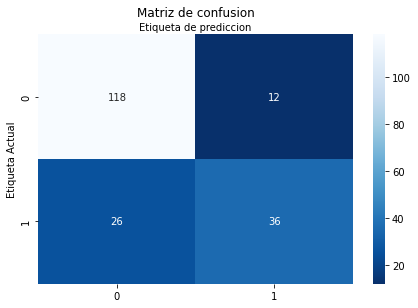

In [12]:
import numpy as np
class_names = [0,1]
fig,ax = plt.subplots() #obtenemos las variables figura y ejes del gráfico (nos permite cambiar los atributos propios de cada seccion)
tick_marks = np.arange(len(class_names))  #definimos los valores que van a tener las líneas de guía
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names) #definimos los tick marks en el gráfico
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Etiqueta Actual")
plt.xlabel("Etiqueta de prediccion")

Creamos la presentación del gráfico

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap='Blues_r', fmt='g')
ax.axis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion', y=1.1)
plt.y_label('Etiqueta Actual')
plt.x_label('Etiqueta de Prediccion)

- seaborn nos permite crear un mapa de calor a partir de los valores entregados (la matriz de confusión en este caso), los parámetros que entregamos son: annot → permite colocar los valores sobre el gráfico, cmap → estilo del gráfico, fmt → formato de los valores
- ax.xaxis,set_label_position() → nos permite definir donde colocar la etiqueta del eje x
- plt.tight_layout() → crea un padding en torno al gráfico (lo enmarca)

Otra forma de evaluar nuestro modelo es a través del método accuracy_score del módulo metrics:

metrics.accuracy_score(Y_test,y_pred)